**Nome: Leonardo Zaniboni Silva  11801049**


Importando o **Dataset**

In [1]:
import tensorflow as tf
import numpy as np

mnistDataBase = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnistDataBase.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

x_train = tf.image.resize(x_train, [7, 7]).numpy()
x_test = tf.image.resize(x_test, [7, 7]).numpy()

Aqui já temos a imagem de entrada em tamanho reduzido **(28,28) -> (7,7)**

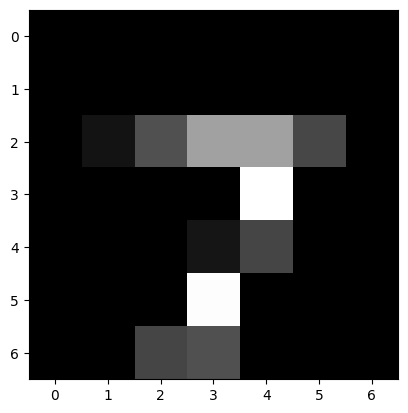

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap='gray')
plt.show()

Treinando o modelo...

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', input_shape=(7, 7, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2306 - loss: 2.1529 - val_accuracy: 0.3985 - val_loss: 1.7399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3995 - loss: 1.7001 - val_accuracy: 0.4307 - val_loss: 1.6187
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4198 - loss: 1.6230 - val_accuracy: 0.4431 - val_loss: 1.5889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4317 - loss: 1.5873 - val_accuracy: 0.4425 - val_loss: 1.5773
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4362 - loss: 1.5800 - val_accuracy: 0.4435 - val_loss: 1.5723


Na tentativa de diminuir o tempo de espera para se ter o resultado na simulação do VIVADO, essa camada de max-pooling foi incluída. No entanto, isso resulta em uma acurácia mais baixa, já que o max-pooling descarta informações críticas, principalmente em features maps já pequenas... (como neste caso).

Ao retirar essa camada de sub-amostragem, a acurácia sobe na casa dos 90%.

Salvando os pesos ...

In [5]:
weights = model.get_weights()
np.savez("cnn_weights_embbeded.npz", *weights)

Em seguida, os pesos e algumas imagens foram exportadas para arquivos .h (MANUALMENTE)

In [6]:
data = np.load("cnn_weights_embbeded.npz")

In [8]:
#EXEMPLO: PEGANDO PESOS
conv_kernels = data['arr_0']
conv_bias = data['arr_1']
dense_weights = data['arr_2']
dense_bias = data['arr_3']

In [ ]:
#EXEMPLO: PEGANDO IMAGENS
x_test[1]